In [1451]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [1452]:
df_new = pd.read_csv('data.csv')
# print(df_new)

In [1453]:
# df_new = pd.read_pickle('df_new.pkl')

In [1454]:
# df_new.columns

In [1455]:
df_new.shape

(21418, 13)

In [1456]:
# # create an example DataFrame with missing values
# df_new5 = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
#                    'B': [6, np.nan, 8, 9, 10],
#                    'C': [11, 12, 13, np.nan, 15]})

# create a matrix plot of missing data
# msno.matrix(df_new)

# display the plot
# plt.show()

**No missing data**

In [1457]:
# df_new.drop(['yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'year_sold', 'age_house_binned','done_reno' ], axis = 1, inplace = True)

In [1458]:
type(df_new)

pandas.core.frame.DataFrame

In [1459]:
df_new.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### **KNN Model**

In [1460]:
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,0,3,7,1180,0,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,0,3,7,2170,400,1690,7639
2,180000.00,2,1.00,770,10000,1.00,0,3,6,770,0,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,0,5,7,1050,910,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,0,3,8,1680,0,1800,7503


In [1461]:
# X = df_new[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade','sqft_basement', 'sqft_lot15', 'age_house','age_renovated']]
X = df_new[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
y = df_new[["price"]]

In [1462]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6752)

In [1463]:
# Search the best n_neighbors value to choose from 1 to 10
n_neighbors = []
knn_score_list = []
for n in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn = knn.score(X_test, y_test)
    knn_score_list.append(knn)  
    n_neighbors.append(n) 
print(knn_score_list)
n_neighbors

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neighbors/_cla

[0.007469654528478058, 0.004901960784313725, 0.003734827264239029, 0.003734827264239029, 0.003034547152194211, 0.0032679738562091504, 0.003034547152194211, 0.0032679738562091504, 0.0035014005602240898]


[1, 2, 3, 4, 5, 6, 7, 8, 9]

The n_neighbors with the highest knn_score is 1


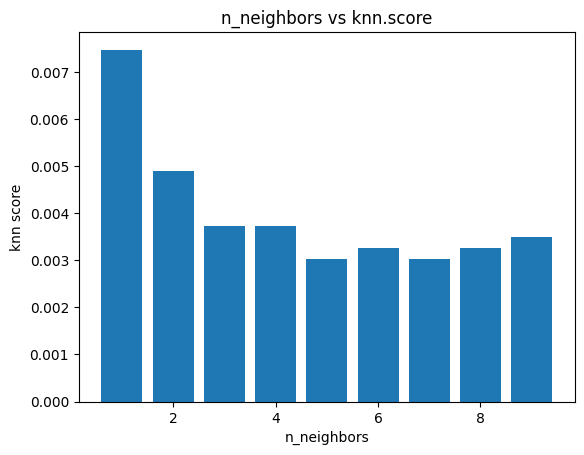

In [1464]:

# Plot
x_axis = n_neighbors
y_axis = knn_score_list
plt.bar(x_axis,y_axis)
# find the index of the highest value
max_index = np.argmax(y_axis)
# get the corresponding label
max_label = x_axis[max_index]
# print the label
print(f"The n_neighbors with the highest knn_score is {max_label}")
# add labels and title
plt.xlabel('n_neighbors')
plt.ylabel('knn score')
plt.title('n_neighbors vs knn.score')
plt.show() 

In [1465]:
knn = KNeighborsClassifier(n_neighbors=max_label)

In [1466]:
knn.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [1467]:
knn.score(X_test, y_test)

0.007469654528478058

In [1468]:
# knn.predict([[3,2,1000,11000,2,1,
#               1,1,1,750,0,900,
#               9000,20,10]])

### **Linear Regression Model**

In [1469]:
X_train = X_train.astype('float64');
X_test = X_test.astype('float64');

In [1470]:

# Scaling

# Since the features are in different scale, we want to scale the features before we train the model.

# Create the Scaler object
std_scaler = preprocessing.MinMaxScaler()

# apply the transformation to the training data
X_train_std = std_scaler.fit_transform(X_train) 

# apply the transformation to the testing data
X_test_std = std_scaler.transform(X_test) # but we only transform our testing data with already fit scaler

# convert resulting array back to dataframe
X_test_std_df_new = pd.DataFrame(X_test_std, columns = X_train.columns)

X_test_std_df_new.head()



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,0.30,0.39,0.44,0.01,0.40,0.00,0.50,0.56,0.44,0.00,0.57,0.03
1,0.30,0.07,0.15,0.00,0.20,0.00,1.00,0.22,0.15,0.00,0.14,0.01
2,0.30,0.29,0.26,0.00,0.40,0.00,0.50,0.33,0.26,0.00,0.35,0.01
3,0.30,0.18,0.15,0.01,0.00,0.00,0.75,0.33,0.11,0.09,0.25,0.02
4,0.40,0.29,0.46,0.04,0.40,0.00,0.50,0.67,0.29,0.37,0.57,0.06


In [1471]:
# Simple Linear Model

linear_model = LinearRegression()
linear_model.fit(X_train_std, y_train)



LinearRegression()

In [1472]:
print('Intercept: {}'.format(linear_model.intercept_))
print('Columns: {}'.format(X_train.columns))
print('Coefficients: {}'.format(linear_model.coef_))

Intercept: [-172707.58780712]
Columns: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')
Coefficients: [[-358942.05397777 -118250.48260574  730129.27151421   12055.00164325
     8605.81596416  344512.88928175  229121.11696562  952103.21171191
   565767.41081771  358778.46163464   93580.41051584 -380930.6061952 ]]


In [1473]:
# Return the coefficient of determination R^2 of the prediction.
linear_score = linear_model.score(X_train_std, y_train)
linear_score

0.5927851610340695

In [1474]:
# Use the scaled test data to generate the prediction price
y_pred_linear = linear_model.predict(X_test_std_df_new)

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [1475]:


# Calculate the mean-squared error
linear_mse = metrics.mean_squared_error(y_test, y_pred_linear)
linear_mse



52561476794.65644

In [1476]:
# just want to demostrate the answer will be one because the output is generated by the model
linear_model.score(X_test_std_df_new, y_pred_linear) 

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


1.0

In [1477]:
# linear_model.predict([[3,2,1000,11000,2,1,
#               1,1,1,750,0,900,
#               9000,20,10,1]])

In [1478]:
pd.set_option('display.float_format', '{:.2f}'.format)
n_rows = 40
y_pred_linear_df_new = pd.DataFrame(y_pred_linear, columns = ['linear_pred']) 
model_results = pd.concat([y_test.reset_index(), y_pred_linear_df_new], axis = 1, sort = False) 

model_results.head(n_rows)



,index,price,linear_pred
0,11060,1070000.00,932418.76
1,3497,195000.00,355068.78
2,4628,441500.00,486264.37
3,1621,411000.00,401380.55
4,172,917500.00,1064322.34
5,9392,165000.00,354905.19
6,12037,200000.00,232066.86
7,13527,360000.00,483208.01
8,12568,290000.00,574636.70
9,8440,999000.00,654994.11


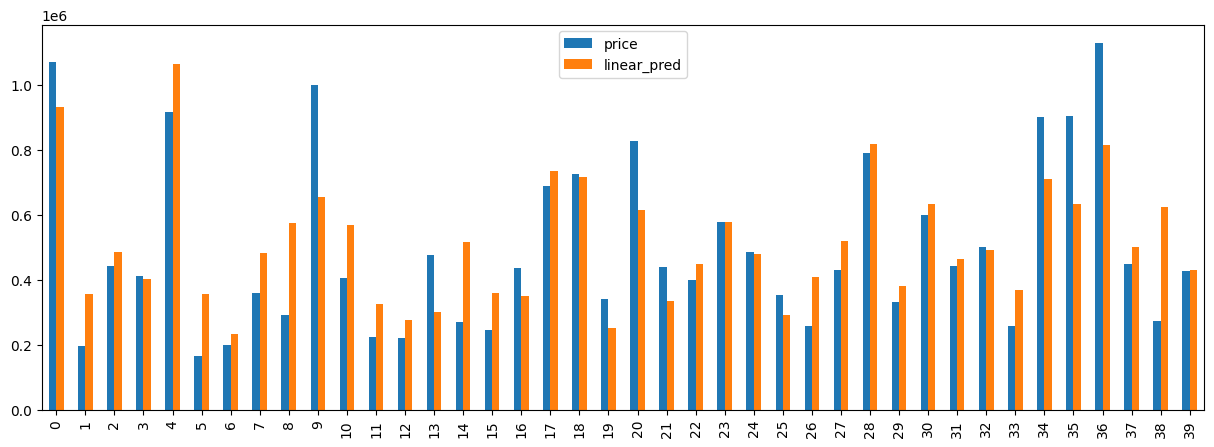

In [1479]:
model_results[['price', 'linear_pred']].head(n_rows).plot.bar(figsize = (15, 5))
plt.show()